In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

In [19]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Pandas version 1.0.5
Matplotlib version 3.2.2


## **Create Data**
The data set will consist of 5 baby names and the number of births recorded for that year (1880).


In [20]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [21]:
#zip for merge de datas
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [22]:
df = pd.DataFrame(data = BabyDataSet, columns=['Name','Births'])
df

,Name,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [23]:
df.to_csv('births1880.csv',index=False,header=False)

In [24]:
df = pd.read_csv('births1880.csv')
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [25]:
df = pd.read_csv('births1880.csv',header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [26]:
df = pd.read_csv('births1880.csv',names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [27]:
df.dtypes

Names     object
Births     int64
dtype: object

In [28]:
df.Births.dtype

dtype('int64')

# **Analyze Data**
To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [29]:
Sorted = df.sort_values(['Births'],ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [30]:
df['Births'].max()

973

# **Present Data**
Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Mel is the most popular baby name in the data set.

plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

Explain the pieces:
df['Names'] - This is the entire list of baby names, the entire Names column
df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
df['Births'].max() - This is the maximum value found in the Births column

[df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The Births column is equal to 973]

An alternative way could have been to use the Sorted dataframe:
Sorted['Names'].head(1).value

The str() function simply converts an object into a string.

The most popular name


,Names,Births
4,Mel,973


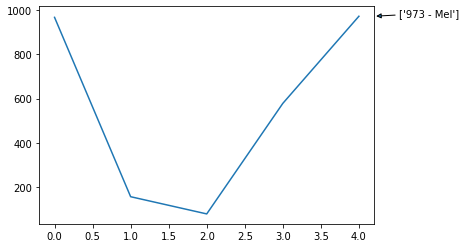

In [31]:
df['Births'].plot()
#Maximum Value in data set
MaxValue = df['Births'].max()

#Name Associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

#Text to display on graph 
Text = str(MaxValue) + ' - '+MaxName

plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

print("The most popular name")
df[df['Births'] == df['Births'].max()]

## **Lesson 2**
# **Create Data**
The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names.

In [32]:
names = ['Bob','Jessica','Mary','John','Mel']

In [33]:
np.random.seed(500)
random_names = [names[np.random.randint(low=0,high=len(names))]for i in range(1000)]
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [34]:
births =[np.random.randint(low=0,high=1000)for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [35]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [36]:
df = pd.DataFrame(data = BabyDataSet,columns=['Names','Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [37]:
df.to_csv('births1880.txt',index=False,header=False)

In [38]:
df = pd.read_csv('births1880.txt')
df

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124
...,...,...
994,John,151
995,Jessica,511
996,John,756
997,Jessica,294


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [40]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [41]:
df = pd.read_csv('births1880.txt',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [42]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [43]:
df = pd.read_csv('births1880.txt', names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


# **Prepare Data**
The data we have consists of baby names and the number of births in the year 1880. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "Names" column still only has five unique names.

We can use the unique property of the dataframe to find all the unique records of the "Names" column.

In [44]:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [45]:
for i in df['Names'].unique():
  print(i)

Mary
Jessica
Bob
John
Mel


In [46]:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [47]:
name = df.groupby('Names')
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


## **Analyze Data**
To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [48]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [49]:
df['Births'].max()

106817

## **Present Data**
Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Bob is the most popular baby name in the data set.


The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


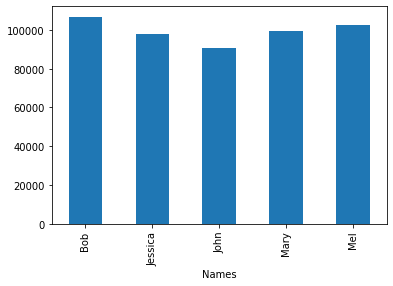

In [50]:
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

## **Lesson 3**
**Get Data - Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.
Prepare Data - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.
Analyze Data - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.
Present Data - The results will be plotted.**

In [51]:
np.random.seed(111)
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          836 non-null    object        
 1   Status         836 non-null    int64         
 2   CustomerCount  836 non-null    int64         
 3   StatusDate     836 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [54]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [100]:
array = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
len(array)
array.sort()
teste = pd.DataFrame(data=array)
np.median(array)
np.mean(array)
#print("{:.2f}".format(np.mean(array)))
#print("{:.2f}".format(np.std(array)))
curtose = 3 *(np.mean(array) - np.median(array) ) / np.std(array)
curtose
#print(np.percentile(array,25))
#print(np.percentile(array,50))
#print(np.percentile(array,75))
#print(np.percentile(array,90))
#print(np.percentile(array,10))
t = (np.mean(array) - 5) / np.std(array)
t
k = (np.percentile(array,75) - np.percentile(array,25)) /( 2 *(np.percentile(array,90) - np.percentile(array,10)))
k
#teste.describe()

0.5